# Exercises

## R-1.11 
Demonstrate how to use Python’s list comprehension syntax to produce the list [1, 2, 4, 8, 16, 32, 64, 128, 256].

### answer

In [1]:
[2**i for i in range(9)]

[1, 2, 4, 8, 16, 32, 64, 128, 256]

## C-1.18
Demonstrate how to use Python’s list comprehension syntax to produce the list [0, 2, 6, 12, 20, 30, 42, 56, 72, 90].

### answer

Series can be represented as follow:
$$
\begin{array}{ll}
a_1 = 1\\
a_2 = b_1 = 2\\
a_3 = b_2 = 6\\
a_4 = b_3 = 12\\
a_5 = b_4 = 20\\
\vdots
\end{array}
$$

Now, we can think series $b_n$ as arithmetic sequence:
$$
\begin{array}{ll}
b_n &= b_1 + (n-1)\cdot d \\
    &= 2 + (n-1)\cdot 2\\
    &= 2n
\end{array}{}
$$

Therefore series $a_n$ can be written as:
$$
\begin{array}{ll}
a_n & = a_1 + \displaystyle\sum_{n=1}^{n-1} b_n\\
&= 0 + 2 \cdot \frac{(n-1) \cdot n}{2}\\
&= n^2 - n\\
\end{array}
$$

In [2]:
[i**2 - i for i in range(1,11)]

[0, 2, 6, 12, 20, 30, 42, 56, 72, 90]

## C-1.28
The **p-norm** of a vector $v = (v_1, v_2, \cdots, v_n)$ in $n$-dimensional space is defined as
$$
||v|| = \sqrt[p]{v_1^p + v_2^p + \cdots + v_n^p}
$$
For the special case of $p = 2$, this results in the traditional Euclidean
norm, which represents the length of the vector. For example, the Euclidean
norm of a two-dimensional vector with coordinates $(4,3)$ has a
Euclidean norm of $\sqrt{4^2 + 3^2} = \sqrt{16 + 9} = \sqrt{25} = 5$. Give an implementation
of a function named norm such that $norm(v, p)$ returns the p-norm
value of $v$ and $norm(v)$ returns the Euclidean norm of $v$. You may assume
that $v$ is a list of numbers.

### answer

In [3]:
import numpy as np
def norm(v,p):
    v = np.array(v)
    power = v**p
    return power.sum()**(1/p)

In [4]:
v = [4,3]
print('norm(v,2):' , norm(v,2)) # Euclidean norm
print('norm(v,3):' , norm(v,3))

norm(v,2): 5.0
norm(v,3): 4.49794144528


## P-1.35
The **birthday paradox** says that the probability that two people in a room
will have the same birthday is more than half, provided $n$, the number of
people in the room, is more than 23. This property is not really a paradox,
but many people find it surprising. Design a Python program that can test
this paradox by a series of experiments on randomly generated birthdays,
which test this paradox for $n = 5,10,15,20, . . . ,100$.

### answer

We can think the probability of having same birth day as: 
$$ 
p(\text{same birthday}) = 1 - p(\text{different birthday})
$$

We will calculate the probability that all $n$ birthdays are different.

Let's consider the case when $n = 3$:
$$
p = 1 \cdot \left(1 - \frac{1}{365}\right) \cdot \left(1- \frac{2}{365}\right)
$$

In case of $n = 4$:
$$
p = 1 \cdot \left(1 - \frac{1}{365}\right) \cdot \left(1- \frac{2}{365}\right) \cdot \left(1- \frac{3}{365}\right)
$$

Now, we can generalize the equation for the case of $n$ people:
$$
\begin{array}{ll}
p &= 1 \cdot \left(1 - \frac{1}{365}\right) \cdot \left(1- \frac{2}{365}\right) \cdot \left(1- \frac{3}{365}\right) \cdots \left(1- \frac{n-1}{365}\right)\\
&= \frac{_{365}P_{n}}{365^n}
\end{array}
$$

In [5]:
from scipy.misc import factorial, comb
def same_birth_prob(n):
    return 1 - factorial(n)*comb(365,n)/(365**n) #Probability of having same birth day in n people in the room

For case of $n=10$:

In [6]:
same_birth_prob(10)

0.11694817771107746

For case of $n = 20$:

In [7]:
same_birth_prob(20)

0.4114383835806472

For case of $n = 23$:

In [8]:
same_birth_prob(23)

0.5072972343239677

Let's visualize the result of this.

In [9]:
birth_prob = [same_birth_prob(i) for i in range(1,70)]

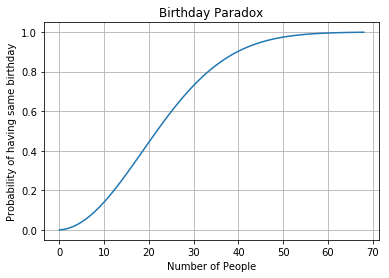

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(birth_prob)
plt.grid()
plt.xlabel('Number of People')
plt.ylabel('Probability of having same birthday')
plt.title('Birthday Paradox')